# PYMACEUTICALS
Data Analysis of results from an animal study that compared four different drug-based, anti-cancer treatments (Capomulin, Infubinol, Ketapril, and Placebo) to sqamous cell carcinoma(SCC), a commonly occuring form of skin cancer.

![title](Laboratory.jpg)

Pymaceuticals Inc., is a pharmaceutical company based out of San Diego, CA. It specializes in drug-based, anti-cancer pharmaceuticals. They have begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As part of their animal study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. 

This report is the result of analysing the data to show how the four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

----

### Analysis

---



In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_df = pd.read_csv(mouse_drug_data_to_load)
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


Read the Mouse and Drug Data and the Clinical Trial Data

In [2]:
trial_df = pd.read_csv(clinical_trial_data_to_load)
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
pyme_df = pd.merge(trial_df, mouse_df, how="left", on="Mouse ID")
# Display the data table for preview
pyme_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorVolGroup = pyme_df.groupby(["Drug","Timepoint"])
# Convert to DataFrame
tumorResponse_df = pd.DataFrame(tumorVolGroup["Tumor Volume (mm3)"].mean())
tumorResponse_df = tumorResponse_df.reset_index()
# Preview DataFrame
tumorResponse_df.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
tumorResponseErr_df = pd.DataFrame(tumorVolGroup["Tumor Volume (mm3)"].sem())
tumorResponseErr_df = tumorResponseErr_df.reset_index()
# Preview DataFrame
tumorResponseErr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumorResponse_df = tumorResponse_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumorResponse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
tumorResponseErr_df = tumorResponseErr_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumorResponseErr_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


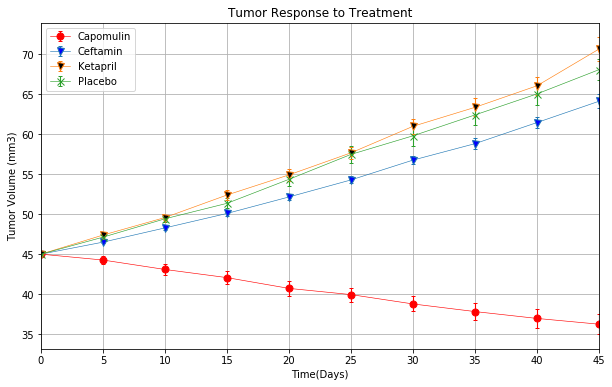

In [8]:
response = tumorResponse_df[["Capomulin","Ceftamin","Ketapril", "Placebo"]]
errors = tumorResponseErr_df[["Capomulin","Ceftamin","Ketapril", "Placebo"]]

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(10, 6))
kwargs = dict( capsize=2,elinewidth=1.1, linewidth=0.6, ms=7)

response["Capomulin"].plot( yerr = errors, fmt='-o', c='r', mfc='r', **kwargs, label='Capomulin',legend=True)
response["Ceftamin"].plot( yerr = errors, fmt='-v', mfc='b', **kwargs, label='Ceftamin',legend=True)
response["Ketapril"].plot( yerr = errors, fmt='-v', mfc='k',  **kwargs, label='Ketapril',legend=True)
response["Placebo"].plot( yerr = errors, fmt='-x', mfc='g', **kwargs, label='Placebo',legend=True)
plt.legend(loc='best')
plt.grid(True)
#### Incorporate the other graph properties
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
#### Save Figure
plt.savefig("Images/TumorResponseToTreatment.png")


plt.show()


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
MetastaticResponse_df = pd.DataFrame(tumorVolGroup["Metastatic Sites"].mean())
# Preview DataFrame
MetastaticResponse_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MetastaticResponseErr_df = pd.DataFrame(tumorVolGroup["Metastatic Sites"].sem())
# Preview DataFrame
MetastaticResponseErr_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
MetastaticResponse_df = MetastaticResponse_df.reset_index()
MetastaticResponse_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Minor Data Munging to Re-Format the Data Frames

MetastaticResponse_df = MetastaticResponse_df.pivot(index='Timepoint', columns='Drug', values="Metastatic Sites")

# Preview that Reformatting worked
MetastaticResponse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [13]:
MetastaticResponseErr_df = MetastaticResponseErr_df.reset_index()
MetastaticResponseErr_df = MetastaticResponseErr_df.pivot(index='Timepoint', columns='Drug', values="Metastatic Sites")

MetastaticResponseErr_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


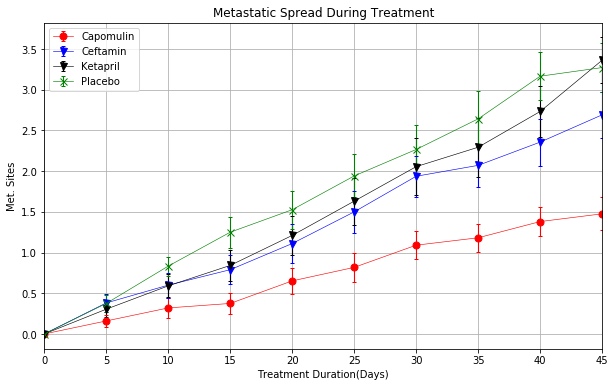

In [14]:
response = MetastaticResponse_df[["Capomulin","Ceftamin","Ketapril", "Placebo"]]
errors = MetastaticResponseErr_df[["Capomulin","Ceftamin","Ketapril", "Placebo"]]

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots(figsize=(10, 6))
kwargs = dict( capsize=2,elinewidth=1.1, linewidth=0.6, ms=7)

response["Capomulin"].plot( yerr = errors, fmt='-o', c='r', mfc='r', **kwargs, label='Capomulin',legend=True)
response["Ceftamin"].plot( yerr = errors, fmt='-v', c='b', mfc='b', **kwargs, label='Ceftamin',legend=True)
response["Ketapril"].plot( yerr = errors, fmt='-v', c='k', mfc='k',  **kwargs, label='Ketapril',legend=True)
response["Placebo"].plot( yerr = errors, fmt='-x', c='g', mfc='g', **kwargs, label='Placebo',legend=True)
plt.legend(loc='best')
plt.grid(True)
#### Incorporate the other graph properties
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
#### Save Figure
plt.savefig("Images/MetastaticSpreadDuringTreatment.png")


plt.show()


## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MiceCount_df = pd.DataFrame(tumorVolGroup["Drug"].count())
MiceCount_df = MiceCount_df.rename(columns={"Drug":"Mice Count"})
MiceCount_df = MiceCount_df.reset_index()
# # Preview DataFrame
MiceCount_df.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
MiceCount_df = MiceCount_df.pivot(index='Timepoint', columns='Drug', values="Mice Count")

# Preview the Data Frame
MiceCount_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


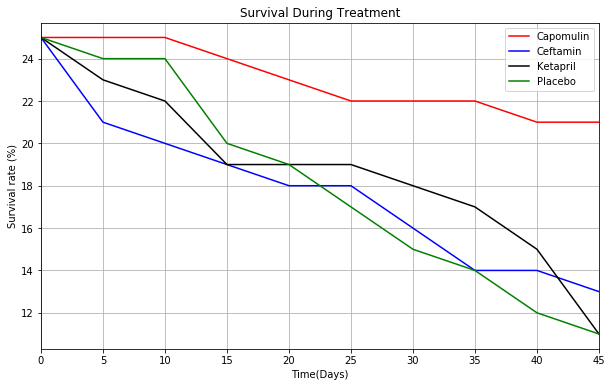

In [17]:
# Generate the Plot (Accounting for percentages)
response = MiceCount_df[["Capomulin","Ceftamin","Ketapril", "Placebo"]]

fig, ax = plt.subplots(figsize=(10, 6))

response["Capomulin"].plot(y=response,  c='r', mfc='r',  label='Capomulin',legend=True)
response["Ceftamin"].plot(y=response,  c='b', mfc='b',  label='Ceftamin',legend=True)
response["Ketapril"].plot(y=response, c='k', mfc='k',   label='Ketapril',legend=True)
response["Placebo"].plot(y=response,  c='g', mfc='g',  label='Placebo',legend=True)

plt.legend(loc='best')
plt.grid(True)
#### Incorporate the other graph properties
plt.xlabel("Time(Days)")
plt.ylabel("Survival rate (%)")
plt.title("Survival During Treatment")
#### Save Figure
plt.savefig("Images/SurvivalDuringTreatment.png")


plt.show()


## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [19]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()